In [2]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


### Sentiment Analysis on Movie Reviews

#### 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### Load Dataset

In [6]:
data = pd.read_csv(r"C:\Users\srira\Downloads\OPTIFYX INTERNSHIP 2\IMDB Dataset.csv")

#### 2. Exploratory Data Analysis (EDA)

In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

#### 3. Data Visualizations

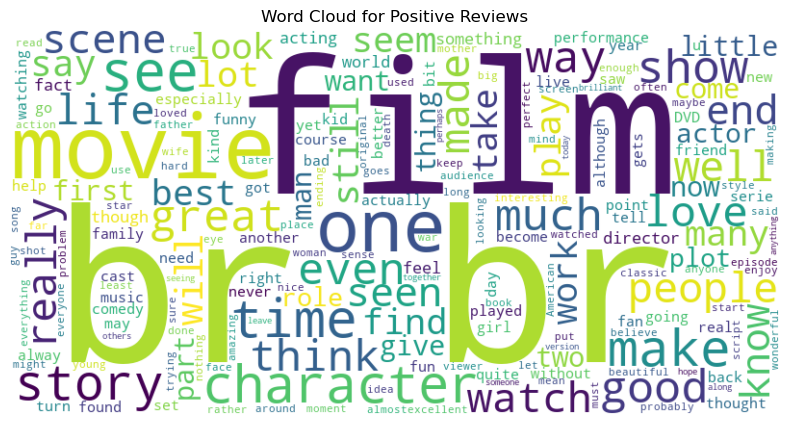

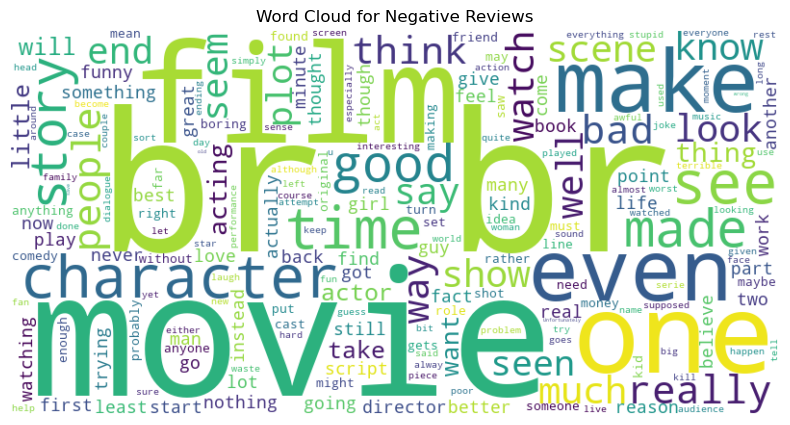

In [10]:
# Word Cloud for Positive and Negative Sentiments
def plot_wordcloud(sentiment, title):
    text = " ".join(data[data['sentiment'] == sentiment]['review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
plot_wordcloud('positive', 'Word Cloud for Positive Reviews')
plot_wordcloud('negative', 'Word Cloud for Negative Reviews')

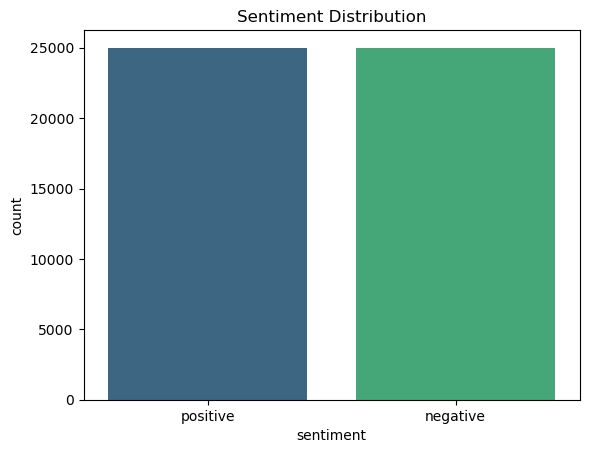

In [11]:
# Bar Chart of Sentiment Distribution
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [12]:
# Preprocessing for Model Training
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['review']).toarray()
y = np.where(data['sentiment'] == 'positive', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4. Model Training

In [13]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}


Decision Tree Report:

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      4961
           1       0.73      0.72      0.72      5039

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



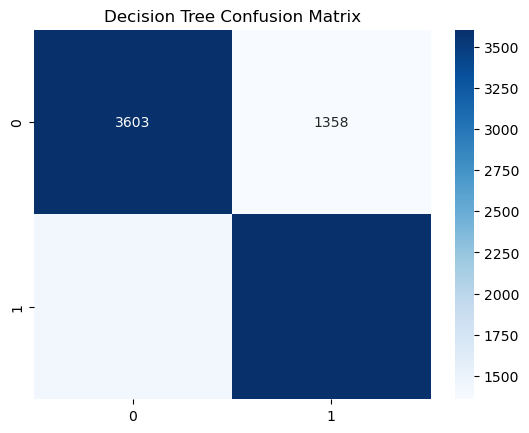


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4961
           1       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



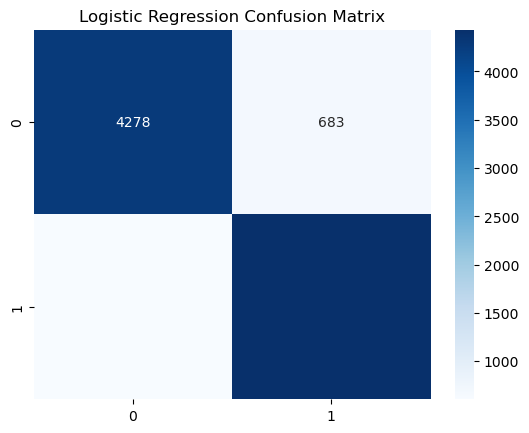


Naive Bayes Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4961
           1       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



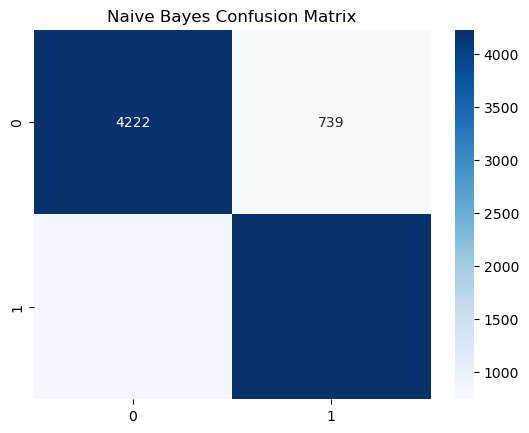


Random Forest Report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



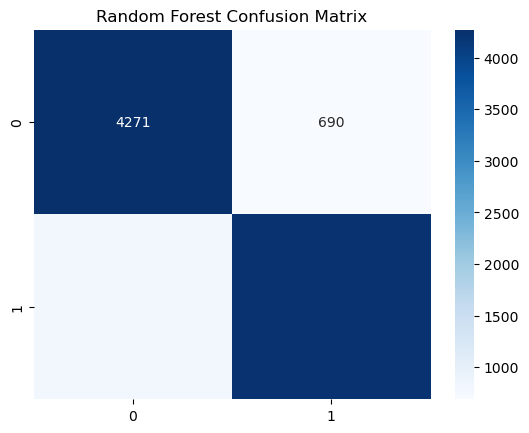

In [14]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Report:\n")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

#### 5. ROC Curve and AUC

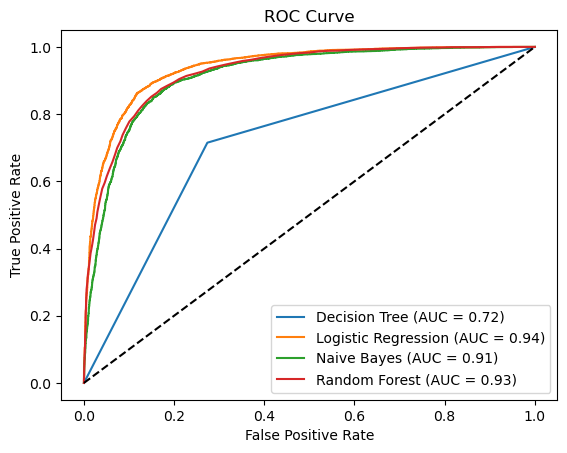

In [15]:
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [16]:
# LSTM Model
# Tokenizing and Padding Sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['review'])
X_seq = tokenizer.texts_to_sequences(data['review'])
X_padded = pad_sequences(X_seq, maxlen=100)
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [17]:
# Building LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64, validation_split=0.1)

C:\Users\srira\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 62s 95ms/step - accuracy: 0.7607 - loss: 0.4701 - val_accuracy: 0.8520 - val_loss: 0.3382
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 52s 92ms/step - accuracy: 0.8879 - loss: 0.2715 - val_accuracy: 0.8570 - val_loss: 0.3335
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 53s 95ms/step - accuracy: 0.9172 - loss: 0.2157 - val_accuracy: 0.8550 - val_loss: 0.3427
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 51s 90ms/step - accuracy: 0.9369 - loss: 0.1670 - val_accuracy: 0.8560 - val_loss: 0.3523
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 52s 92ms/step - accuracy: 0.9540 - loss: 0.1303 - val_accuracy: 0.8568 - val_loss: 0.3766


In [18]:
# Evaluate LSTM
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_seq, y_test_seq)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8550 - loss: 0.3681
LSTM Accuracy: 0.86
